In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
import math
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

# Análise exploratória

In [2]:
heart = pd.read_csv('data/heart.csv')
print(heart.shape)
heart.head()

(297, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


O banco de dados contém 303 registros de 14 variáveis, sendo que cada registro representa informações fisiológicas sobre um paciente. As variáveis age, trestbps, chol e oldpeak são numéricas, sex, cp, fbs, resecg, exang, slope, ca, thal e condition são categóricas. 
 
A variável condition representa a presença de doenças cardíacas no paciente. O valor 0 indica a ausência e 1 a presença de doenças cardíacas no paciente.

As variáveis explicativas são como se segue:
1. age: idade do paciente

2. sex: gênero do paciente. 1 indica masculino, 0 indica feminino.

3. cp (chest pain): tipo de dor no peito  reportada pelo indivíduo. Valores possíveis: 0 (angina comum), 1 (angina incomum), 2 (dor não anginar), 3 (assintomático). Angina é a dor resultante do estreitamento das artérias que conduzem ao coração [1], que levam ao baixo abastecimento do coração com oxigênio e nutrientes. Costumam indicar obstrução ou contrações involuntárias das artérias coronárias.

4. trestbps (resting blood pressure): pressão sanguínea durante repouso em mmHg. Alta pressão sanguínea durante períodos prolongados provocam o estreitamento e eventual ruptura ou vazamento dos vasos sanguíneos, podendo aumentar o risco de doenças cardiovasculares.

5. chol (cholesterol): nível de LDL (low density lipoprotein, ou"colesterol ruim") no sangue. O LDL provoca o estreitamento das artérias, constituindo portanto um possível preditor de doenças cardíacas.

6. fbs (fasting blood sugar): variável binária que indica se o nível de açúcar no sangue do paciente é maior que 120 miligramas por decilitro de sangue. 0 significa falso (não é maior), 1 significa verdadeiro (é maior). Esta variável pode indicar a má resposta do organismo à produção de insulina, o que pode levar a problemas como pressão alta [2] e, consequentemente, a problemas cardiovasculares.

7. restecg (resting electrocardiogram): resultado do exame de eletrocardiograma. Valores possíveis: 0 (normal), 1 (anormalidade no sinal ST-T), 2 (provável caso de hipertrofia ventricular esquerda). A condição de hipertrofia ventricular esquerda indica o aumento da espessura da parede ventrículo esquerdo, câmara responsável por bombear o sangue pelo resto do corpo. Isto costuma ocorrer em resposta a fatores externos, como aumento da pressão sanguínea ou presença de doenças cardiovasculares.

8. thalach: máxima frequência cardíaca observada. O estudo pode inferir se frequências cardíacas mais altas podem estar associadas à ocorrência de doenças cardíacas.

9. exang: se a realização de exercícios físicos induziu angina. Valores possíveis: 0 (não ocorreu) e 1 (ocorreu).

10. oldpeak (peak exercise ST segment): indica a duração da depressão do segmento ST do sinal obtido pelo exame de eletrocardiograma. Uma depressão ou inclinação decrescente do segmento ST pode indicar a presença de doenças cardíacas associadas à redução da circulação sanguínea, como taquicardias.

11. slope: A inclinação do segmento ST do eletrocardiograma durante a realização de execícios físicos intensos. Valores possíveis: 1 (crescente), 2 (plano) e 3 (decrescente)

12. ca: Número de vasos sanguíneos colorizados por fluoroscopia. Exames de fluoroscopia estão relacionados com a medição da densidade dos vasos sanguíneos [3]. Isto os torna potenciais indicadores de problemas relacionados à pressão sanguínea e, portanto, de doenças cardiovasculares.

13. thal: variável categórica significando o status quanto à doença denominada talassemia, que provoca a redução da quantidade de hemoglobina em circulação no sangue. Pode assumir 3 valores: 3 (normal), 6 (defeito fixo) e 7 (defeito reversível)

In [3]:
print(heart.dtypes)

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object


Nota-se que a única variável real é oldpeak. As variáveis categóricas foram interpretadas como valores inteiros.

In [4]:
heart.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

Excepcionalmente, não há valores nulos no dataset.

Text(0.5, 1.0, 'Número de pacientes doentes por idade')

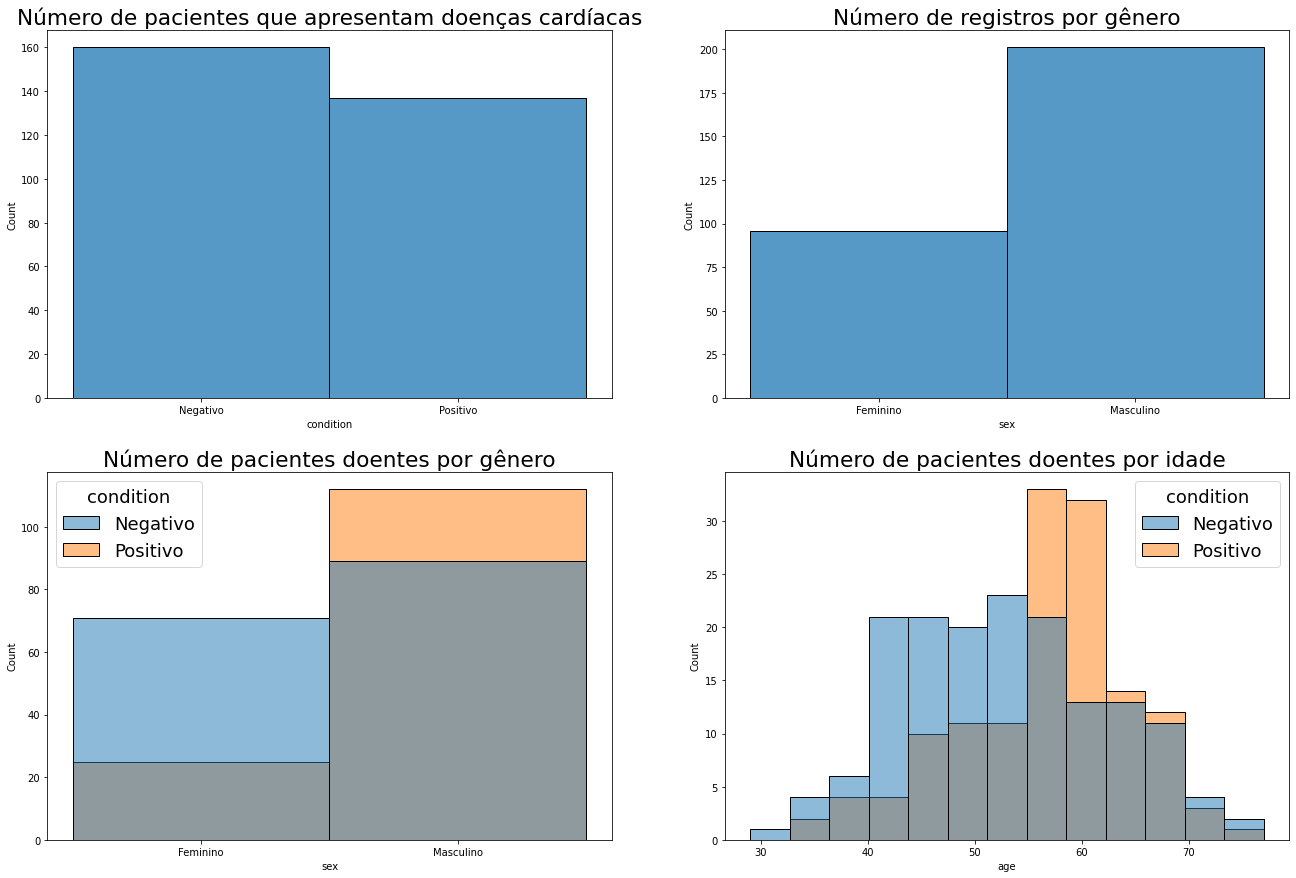

In [5]:
gender_categories = ['Feminino', 'Masculino']
cp_categories =  ['Ang. típica', 'Ang. atípica', 'Não anginal', 'Assintom.']
fbs_categories = ['< 120mg/dl', '>= 120mg/dl']
restecg_categories = ['Normal', 'Anomalia ST-T', 'Hipertrof. ventric. esq.']
exang_categories = ['Negativo', 'Positivo']
slope_categories = ['Ascendente', 'Plana', 'Descendente']
thal_categories = ['Normal', 'Defeito fixo', 'Def. reversível']
condition_categories = ['Negativo', 'Positivo']


exp_heart = heart.copy()
exp_heart.condition = exp_heart.condition.map(lambda x: condition_categories[x])
exp_heart.sex = exp_heart.sex.map(lambda x: gender_categories[x])
exp_heart.cp = exp_heart.cp.map(lambda x: cp_categories[x])
exp_heart.fbs = exp_heart.fbs.map(lambda x: fbs_categories[x])
exp_heart.restecg = exp_heart.restecg.map(lambda x: restecg_categories[x])
exp_heart.exang = exp_heart.exang.map(lambda x: exang_categories[x])
exp_heart.slope = exp_heart.slope.map(lambda x: slope_categories[x])
exp_heart.thal = exp_heart.thal.map(lambda x: thal_categories[x-1])

exp_heart.condition = pd.Categorical(exp_heart.condition, categories=condition_categories, ordered=False)
exp_heart.sex = pd.Categorical(exp_heart.sex, categories=gender_categories, ordered=False)
exp_heart.cp = pd.Categorical(exp_heart.cp, categories=cp_categories, ordered=False)
exp_heart.fbs = pd.Categorical(exp_heart.fbs, categories=fbs_categories, ordered=False)
exp_heart.restecg = pd.Categorical(exp_heart.restecg, categories=restecg_categories, ordered=False)
exp_heart.exang = pd.Categorical(exp_heart.exang, categories=exang_categories, ordered=False)
exp_heart.slope = pd.Categorical(exp_heart.slope, categories=slope_categories, ordered=False)
exp_heart.thal = pd.Categorical(exp_heart.thal, categories=thal_categories, ordered=False)

fig, axis = plt.subplots(2,2, figsize=(6,6))
plt.rcParams.update({'font.size': 18})

plt.subplots_adjust(top=2, right=3)

sns.histplot(data=exp_heart, x="condition", ax=axis[0,0]);
axis[0,0].set_title('Número de pacientes que apresentam doenças cardíacas');

sns.histplot(data=exp_heart, x="sex", ax=axis[0,1])
axis[0,1].set_title('Número de registros por gênero')

sns.histplot(data=exp_heart, x="sex", hue="condition", ax=axis[1,0])
axis[1,0].set_title('Número de pacientes doentes por gênero')

sns.histplot(data=exp_heart, x="age", hue="condition", ax=axis[1,1])
axis[1,1].set_title('Número de pacientes doentes por idade')

O dataset é balanceado com relação ao número de pacientes sem e com doenças cardiovasculares: há aproximadamente 160 registros de pacientes saudáveis e 140 de pacientes com patologias. O número de pacientes por gênero aparenta ser mais desequilibrado, contando com mais de 200 homens e aproximadamente 100 mulheres.

O gráfico de presença de doença por gênero indica que pode haver uma relação entre doença e gênero: uma proporção maior de homens apresenta doença diante do total de pacientes daquele gênero, enquanto no sexo feminino há mais pacientes saudáveis do que doentes.

Com relação à idade, há maior número de pacientes doentes entre aproximadamente 55 e 70 anos. Nas demais faixas de idade, o número de pacientes saudáveis supera o de pacientes com doenças cardíacas.

Text(0.5, 1.0, 'Número de vasos sanguíneos colorizados por fluoroscopia')

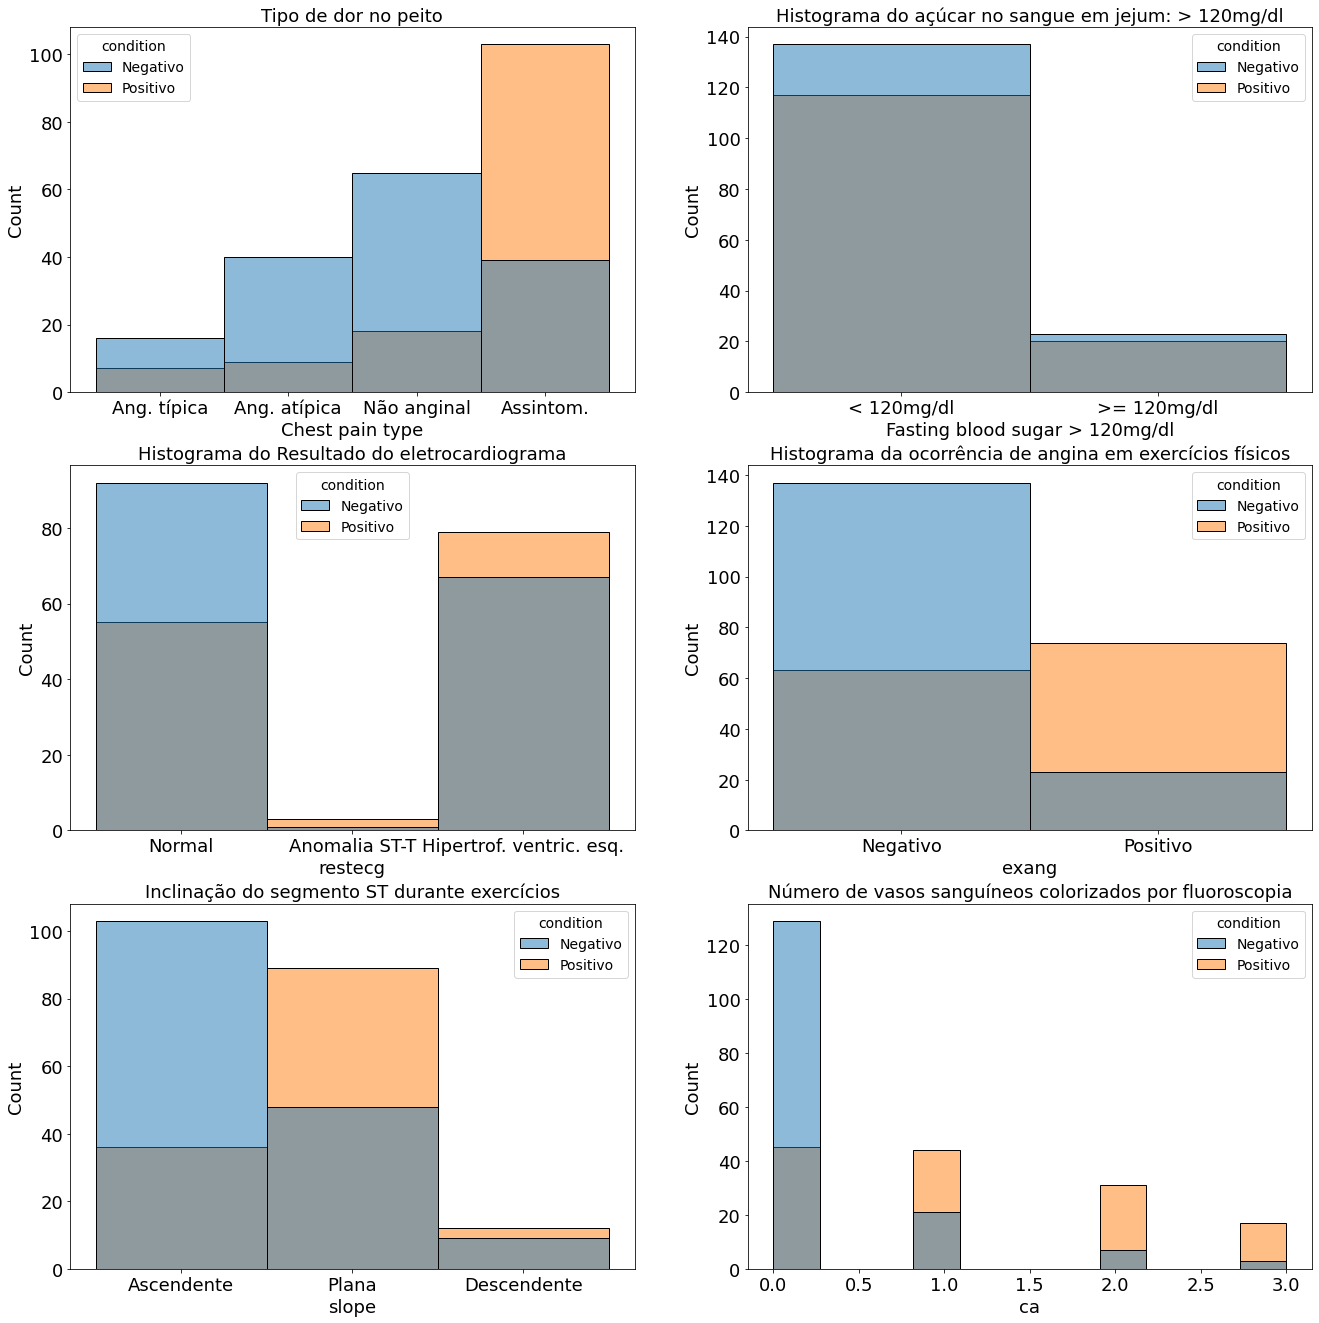

In [6]:
fig, axis = plt.subplots(3, 2, figsize=(6,6))
plt.rcParams.update({'font.size': 14})
plt.subplots_adjust(top=3, right=3)

sns.histplot(data=exp_heart, x="cp", hue="condition", ax=axis[0,0])
axis[0,0].set_xlabel('Chest pain type')
axis[0,0].set_ylabel('Count')
axis[0,0].set_title('Tipo de dor no peito', fontsize=18)

sns.histplot(data=exp_heart, x="fbs", hue="condition", ax=axis[0,1])
axis[0,1].set_xlabel('Fasting blood sugar > 120mg/dl')
axis[0,1].set_ylabel('Count')
axis[0,1].set_title('Histograma do açúcar no sangue em jejum: > 120mg/dl', fontsize=18)

sns.histplot(data=exp_heart, x="restecg", hue="condition", ax=axis[1,0]);
axis[1,0].set_title('Histograma do Resultado do eletrocardiograma', fontsize=18)

sns.histplot(data=exp_heart, x="exang", hue="condition", ax=axis[1,1])
axis[1,1].set_title('Histograma da ocorrência de angina em exercícios físicos', fontsize=18)

sns.histplot(data=exp_heart, x="slope", hue="condition", ax=axis[2,0])
axis[2,0].set_title('Inclinação do segmento ST durante exercícios', fontsize=18)

sns.histplot(data=exp_heart, x="ca", hue="condition", ax=axis[2,1])
axis[2,1].set_title('Número de vasos sanguíneos colorizados por fluoroscopia', fontsize=18)

Curiosamente, pacientes assintomáticos quanto a dor peitoral demonstraram maior proporção de doentes do que os que apresentaram dores. Considerando a realização de exercícios, no entanto, os pacientes que tiveram dores eram, em sua maioria, portadores de doenças cardíacas. 

Dos demais atributos, o que apresenta maior indicação de doenças cardíacas é o número de vasos sanguíneos colorizados por fluoroscopia. Quanto maior o número de vasos colorizados no exame, maior a proporção de pacientes portadores de doenças.

Text(0.5, 1.0, 'Declínio do Segmento ST em pico de atividade física')

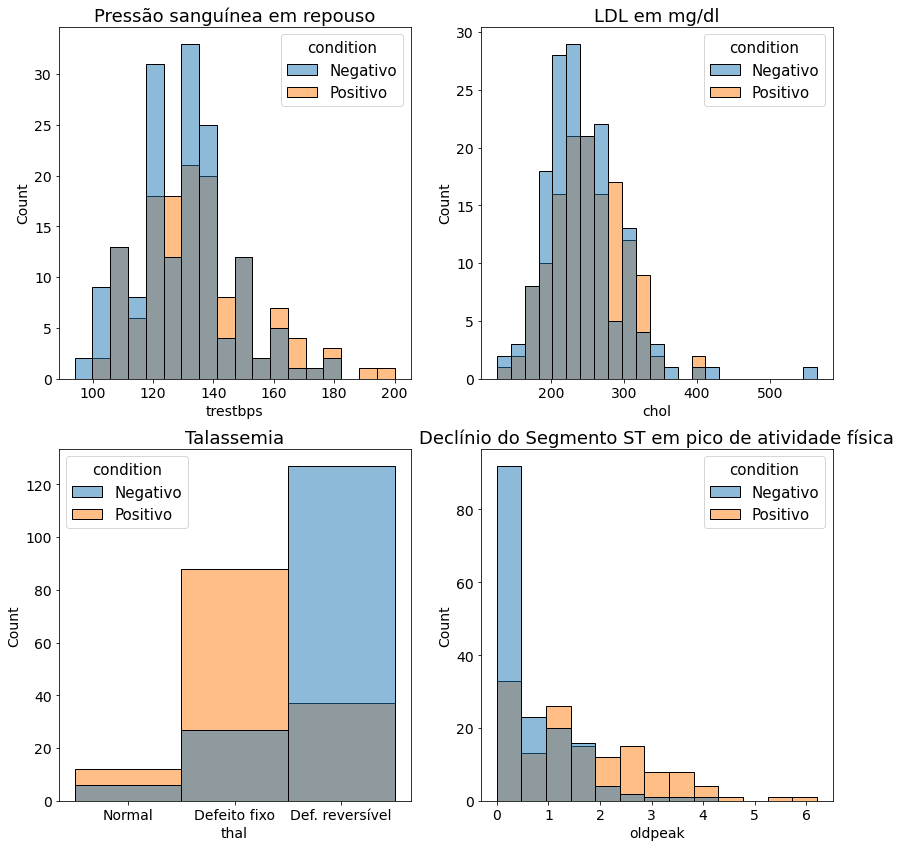

In [7]:
fig, axis = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(top=1.2, right=1.2)
plt.rcParams.update({'font.size': 15})

sns.histplot(exp_heart, x="trestbps", hue="condition", ax=axis[0,0]);
axis[0,0].set_title("Pressão sanguínea em repouso")

sns.histplot(exp_heart, x="chol", hue="condition", ax=axis[0,1]);
axis[0,1].set_title("LDL em mg/dl")

sns.histplot(exp_heart, x="thal", hue="condition", ax=axis[1,0]);
axis[1,0].set_title("Talassemia")

sns.histplot(exp_heart, x="oldpeak", hue="condition", ax=axis[1,1]);
axis[1,1].set_title("Declínio do Segmento ST em pico de atividade física")

A variável "thal" indicando diferentes categorias de talassemia aparente ser um possível critério indicador de presença de doenças cardíacas. A variável oldpeak, que representa o grau de declínio do segmento ST do eletrocardiograma, também pode ser um possível critério de detecção.

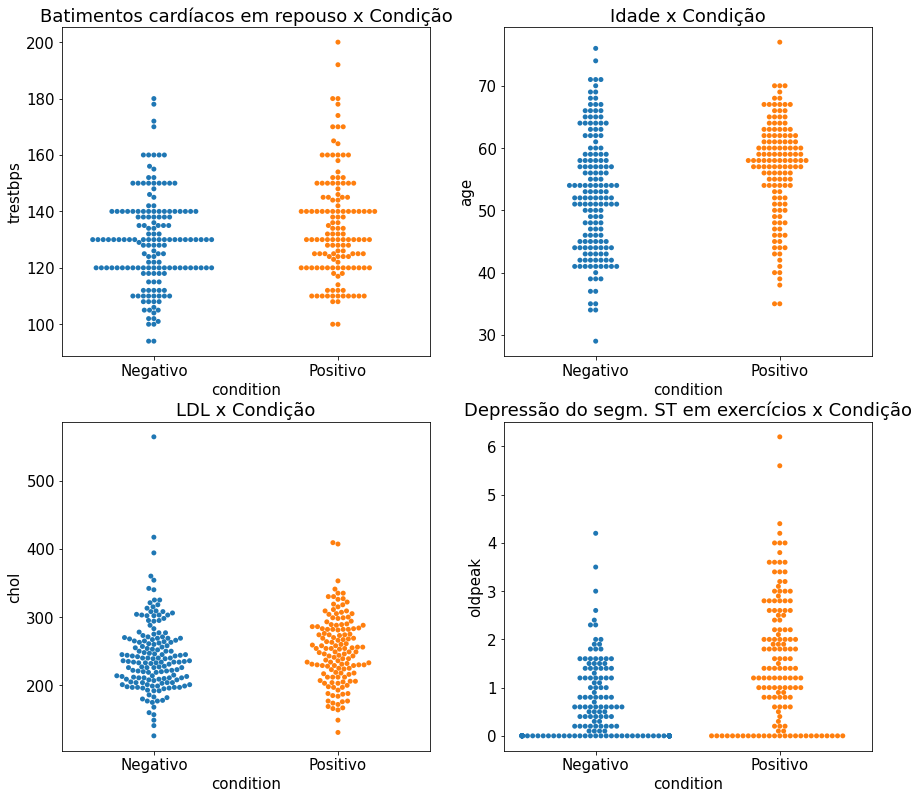

In [8]:
fig, axis = plt.subplots(2, 2, figsize=(6,6))
plt.subplots_adjust(top=1.8, right=2)
plt.rcParams.update({'font.size': 15})

sns.swarmplot(data=exp_heart, x="condition", y="trestbps", ax=axis[0,0])
axis[0,0].set_title("Batimentos cardíacos em repouso x Condição")

sns.swarmplot(data=exp_heart, x="condition", y="age", ax=axis[0,1])
axis[0,1].set_title("Idade x Condição")

sns.swarmplot(data=exp_heart, x="condition", y="chol", ax=axis[1,0])
axis[1,0].set_title("LDL x Condição")

sns.swarmplot(data=exp_heart, x="condition", y="oldpeak", ax=axis[1,1])
axis[1,1].set_title("Depressão do segm. ST em exercícios x Condição");

Os swarmplots acima representam outra forma de encarar a relação entre as variáveis numéricas e a variável categórica condition. As variáveis idade e depressão do segmento ST aparentam ser mais fortes indicadores de doenças cardíacas, demonstrando maior concentração de pontos em valores altos do que valores baixos.

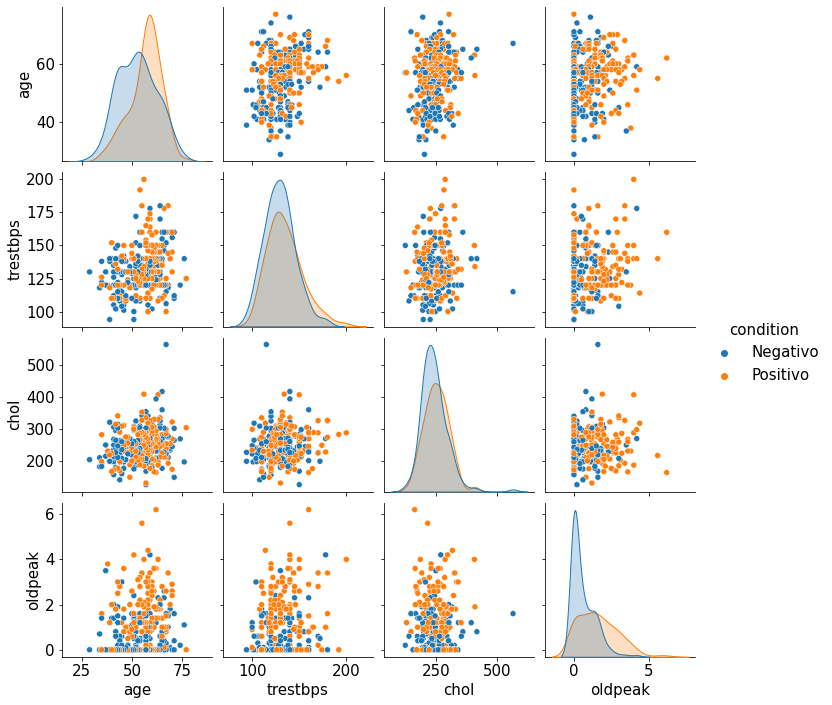

In [9]:
num_var = ["age", "trestbps", "chol", "oldpeak", "condition"]
num_df = exp_heart[num_var]

sns.pairplot(num_df, hue="condition");

No gráfico acima, estuda-se ainda a dispersão conjunta das variáveis numéricas, bem como sua relação com a variável-alvo. A variável idade, como visto nos histogramas exibidos anteriormente, parece . Oldpeak apresenta características semelhantes. Pelos gráficos de dispersão, não é possível discernir um critério de separação claro entre as variáveis numéricas, bem como não parece sugerir que não há correlação significativa entre elas que possa ser explorada em análise e modelagem.

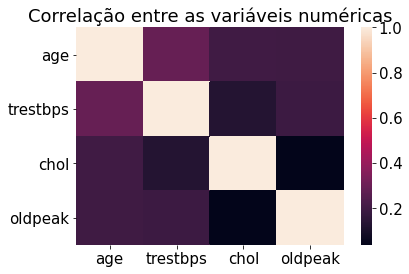

In [10]:
corr_variables = ["age", "trestbps", "chol", "oldpeak", "condition"]

corr_df = exp_heart[corr_variables].corr()
sns.heatmap(corr_df);
plt.title("Correlação entre as variáveis numéricas");

O mapa de calor acima, ilustrando a correlação de Pearson entre as variáveis numéricas, indicam que de fato não há correlação (linear) entre as variáveis numéricas da base de dados. 

Com base nas análises acima, destacam-se as variáveis sex, age, cp, exang, ca e oldpeak como candidatos a fatores preditores da variável condition. Além disso, o valor 1 da variável thal (defeito fixo) também é um possível indicador. As etapas a seguir tratarão de pré-processamento, seleção de variáveis, modelagem e avaliação de modelos.

Primeiramente, serão ajustados modelos no dataset com mínimo pré-processamento, de maneira a obter uma referência de desempenho de onde melhorias podem ser idealizadas. Neste passo, as variáveis categóricas serão convertidas em números e os modelos serão avaliados utilizando 10-fold cross validation.

In [29]:
baseline_df = exp_heart.copy()
baseline_df["sex"] = baseline_df["sex"].cat.codes
baseline_df["fbs"] = baseline_df["fbs"].cat.codes
baseline_df["exang"] = baseline_df["exang"].cat.codes
baseline_df["condition"] = baseline_df["condition"].cat.codes
baseline_df["cp"] = baseline_df["cp"].cat.codes
baseline_df["restecg"] = baseline_df["restecg"].cat.codes
baseline_df["slope"] = baseline_df["slope"].cat.codes
baseline_df["thal"] = baseline_df["thal"].cat.codes
baseline_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,2,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,2,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,2,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,1,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,1,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,1,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,2,0


In [86]:
#cat_vars = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "condition"]
#num_vars = ["age", "trestbps", "chol", "oldpeak"]
#to_dummy_vars = ["cp", "restecg", "slope", "ca", "thal"]
#non_dummy_cat_vars = ["sex", "fbs", "exang", "condition"]

def evaluate_knn(n_neighbors, df, score_dict):
    x = df.loc[:, df.columns != "condition"]
    y = df["condition"]
    
    kfold = KFold(n_splits=10)

    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    test_scores = []
    train_scores= []
    
    for train_indexes, test_indexes in kfold.split(x, y):
        x_train, x_test = x.iloc[train_indexes,:], x.iloc[test_indexes,:]
        y_train, y_test = y[train_indexes], y[test_indexes]

        model = knn.fit(x_train, y_train)
        
        train_score = model.score(x_train, y_train)
        test_score = model.score(x_test, y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)    
    
    avg_train_score = np.mean(np.array(train_scores))
    std_dev_train = np.std(np.array(train_scores))
    avg_test_score = np.mean(np.array(test_scores))
    std_dev_test = np.std(np.array(test_scores))
    
    
    scores_dict['Algoritmo'].append('KNN '+str(n_neighbors)+' vizinhos')
    
    scores_dict['Precisão média (treino)'].append(avg_train_score)
    scores_dict['Desvio padrão (treino)'].append(std_dev_train)
    
    scores_dict['Precisão média (teste)'].append(avg_test_score)
    scores_dict['Desvio padrão (teste)'].append(std_dev_test)
    
    return scores_dict

def evaluate_logistic_regression(df, scores_dict):
    x = df.loc[:, df.columns != "condition"]
    y = df["condition"]
    kfold = KFold(n_splits=10)
    
    test_scores = []
    train_scores= []
    for train_indexes, test_indexes in kfold.split(x,y):
        x_train, x_test = x.iloc[train_indexes,:], x.iloc[test_indexes,:]
        y_train, y_test = y[train_indexes], y[test_indexes]

        model = LogisticRegression(random_state=0).fit(x_train, y_train)
       
        train_score = model.score(x_train, y_train)
        test_score = model.score(x_test, y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)    
    
    avg_train_score = np.mean(np.array(train_scores))
    std_dev_train = np.std(np.array(train_scores))
    avg_test_score = np.mean(np.array(test_scores))
    std_dev_test = np.std(np.array(test_scores))
    
    
    scores_dict['Algoritmo'].append('Regressão logística')
    
    scores_dict['Precisão média (treino)'].append(avg_train_score)
    scores_dict['Desvio padrão (treino)'].append(std_dev_train)
    
    scores_dict['Precisão média (teste)'].append(avg_test_score)
    scores_dict['Desvio padrão (teste)'].append(std_dev_test)
    return scores_dict
    
    
def evaluate_random_forest(df, scores_dict):
    x = df.loc[:, df.columns != "condition"]
    y = df["condition"]
    kfold = KFold(n_splits=10)
    test_scores = []
    train_scores= []
    
    for train_indexes, test_indexes in kfold.split(x,y):
        x_train, x_test = x.iloc[train_indexes,:], x.iloc[test_indexes,:]
        y_train, y_test = y[train_indexes], y[test_indexes]    
    
        model = RandomForestClassifier(random_state=0).fit(x_train, y_train)
        
        train_score = model.score(x_train, y_train)
        test_score = model.score(x_test, y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)    
    
    avg_train_score = np.mean(np.array(train_scores))
    std_dev_train = np.std(np.array(train_scores))
    avg_test_score = np.mean(np.array(test_scores))
    std_dev_test = np.std(np.array(test_scores))
    
    
    scores_dict['Algoritmo'].append('Random Forest')
    
    scores_dict['Precisão média (treino)'].append(avg_train_score)
    scores_dict['Desvio padrão (treino)'].append(std_dev_train)
    
    scores_dict['Precisão média (teste)'].append(avg_test_score)
    scores_dict['Desvio padrão (teste)'].append(std_dev_test)
    return scores_dict

scores_dict = {'Algoritmo' : [], 'Precisão média (treino)':[], 'Desvio padrão (treino)': [],
              'Precisão média (teste)':[], 'Desvio padrão (teste)' :[]}
for n_neighbors in range(1, 11):
    scores_dict = evaluate_knn(n_neighbors, baseline_df, scores_dict)

scores_dict = evaluate_logistic_regression(baseline_df, scores_dict)
scores_dict = evaluate_random_forest(baseline_df, scores_dict)

scores_df = pd.DataFrame.from_dict(scores_dict)
scores_df

,Algoritmo,Precisão média (treino),Desvio padrão (treino),Precisão média (teste),Desvio padrão (teste)
0,KNN 1 vizinhos,1.000000,0.000000,0.552069,0.095420
1,KNN 2 vizinhos,0.778899,0.007940,0.554713,0.124276
2,KNN 3 vizinhos,0.771790,0.006326,0.629425,0.072379
3,KNN 4 vizinhos,0.760188,0.009247,0.625287,0.127659
4,KNN 5 vizinhos,0.778156,0.012908,0.629425,0.085264
5,KNN 6 vizinhos,0.732133,0.013887,0.608621,0.101673
6,KNN 7 vizinhos,0.750094,0.013026,0.656782,0.061888
7,KNN 8 vizinhos,0.726536,0.010725,0.622759,0.094446
8,KNN 9 vizinhos,0.730646,0.012367,0.612989,0.084978
9,KNN 10 vizinhos,0.714178,0.008429,0.625747,0.090966


O teste inicial foi realizado com os algoritmos KNN, regressão logística e Random Forest. O KNN foi testado com 10 diferentes valores para o hiperparâmetro número de vizinhos, enquanto o Random Forest e a regressão logística foram inicializados com seus valores padrão.

A maior precisão média, de 82.87%, foi alcançada pela regressão logística, seguida pelo Random Forest com 81.50%. O melhor desempenho obtido pelo KNN foi de 65% com 7 vizinhos, o que era esperado dado que a falta de pré-processamento implica na dominância das variáveis numéricas sobre as demais.

O próximo teste será feito com as variáveis destacadas durante a análise exploratória: sex, age, cp, exang, ca e oldpeak. As variáveis numéricas serão normalizadas subtraindo-se a média e dividindo-se pelo desvio padrão.

In [87]:
features = ["sex", "age", "cp", "exang", "ca", "oldpeak", "slope", "condition", "thal"]

filtered_df = baseline_df[features].copy()
filtered_df

scaler = StandardScaler()
norm_filtered_df = filtered_df.copy()
norm_filtered_df["age"] = pd.DataFrame(std_scaler.fit_transform(norm_filtered_df[["age"]]), columns=["age"])
norm_filtered_df["oldpeak"] = pd.DataFrame(std_scaler.fit_transform(norm_filtered_df[["oldpeak"]]), columns=["oldpeak"])
norm_filtered_df

,sex,age,cp,exang,ca,oldpeak,slope,condition,thal
0,1,1.600302,0,0,1,-0.820813,1,0,2
1,0,1.600302,0,0,2,0.639470,0,0,2
2,0,1.268242,0,0,0,1.326662,2,0,2
3,1,1.157555,0,0,1,0.295874,1,1,2
4,1,1.046868,0,1,0,0.639470,1,0,2
...,...,...,...,...,...,...,...,...,...
292,1,-1.609620,3,0,0,-0.906712,0,1,1
293,1,-1.720306,3,0,0,0.124076,1,1,1
294,1,-2.163054,3,1,0,0.467672,1,1,1
295,0,-2.163054,3,0,0,0.295874,0,0,2


In [89]:
scores_dict = {'Algoritmo' : [], 'Precisão média (treino)':[], 'Desvio padrão (treino)': [],
              'Precisão média (teste)':[], 'Desvio padrão (teste)' :[]}

for n_neighbors in range(1, 11):
    scores_dict = evaluate_knn(n_neighbors, norm_filtered_df, scores_dict)

scores_dict = evaluate_logistic_regression(norm_filtered_df, scores_dict)
scores_dict = evaluate_random_forest(norm_filtered_df, scores_dict)

scores_df = pd.DataFrame.from_dict(scores_dict)
scores_df

,Algoritmo,Precisão média (treino),Desvio padrão (treino),Precisão média (teste),Desvio padrão (teste)
0,KNN 1 vizinhos,0.996259,0.001675,0.788966,0.097874
1,KNN 2 vizinhos,0.891899,0.010973,0.781034,0.086186
2,KNN 3 vizinhos,0.909843,0.008240,0.811839,0.066716
3,KNN 4 vizinhos,0.890391,0.004615,0.797701,0.068589
4,KNN 5 vizinhos,0.893015,0.008070,0.794943,0.066871
5,KNN 6 vizinhos,0.867569,0.009856,0.828621,0.069804
6,KNN 7 vizinhos,0.875423,0.010554,0.818391,0.058075
7,KNN 8 vizinhos,0.863824,0.008206,0.828621,0.073795
8,KNN 9 vizinhos,0.845869,0.009811,0.818391,0.054113
9,KNN 10 vizinhos,0.851101,0.012959,0.818391,0.065757


O KNN apresentou grande melhora, mostrando maior precisão média de 82,2%  no conjunto de teste com 6 vizinhos, comparando com o 65% obtido anteriormente com 7 vizinhos. A regressão logística caiu a aproximadamente 79% dos 82% observados anteriormente, enquanto o Random Forest caiu de 81% para 80%.

A proxima estratégia de pré-processamento consistirá em converter as variáveis categóricas não-binárias, cp, ca, slope e thal, em dummies. 

In [90]:
to_dummy_vars = ["cp", "ca", "slope", "thal"]
dummy_df = pd.get_dummies(norm_filtered_df, columns=to_dummy_vars)
dummy_df

,sex,age,exang,oldpeak,condition,cp_0,cp_1,cp_2,cp_3,ca_0,ca_1,ca_2,ca_3,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2
0,1,1.600302,0,-0.820813,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
1,0,1.600302,0,0.639470,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1
2,0,1.268242,0,1.326662,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1
3,1,1.157555,0,0.295874,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1
4,1,1.046868,1,0.639470,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,1,-1.609620,0,-0.906712,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
293,1,-1.720306,0,0.124076,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0
294,1,-2.163054,1,0.467672,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0
295,0,-2.163054,0,0.295874,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1


In [92]:
scores_dict = {'Algoritmo' : [], 'Precisão média (treino)':[], 'Desvio padrão (treino)': [],
              'Precisão média (teste)':[], 'Desvio padrão (teste)' :[]}

for n_neighbors in range(1, 11):
    scores_dict = evaluate_knn(n_neighbors, dummy_df, scores_dict)

scores_dict = evaluate_logistic_regression(dummy_df, scores_dict)
scores_dict = evaluate_random_forest(dummy_df, scores_dict)

scores_df = pd.DataFrame.from_dict(scores_dict)
scores_df

,Algoritmo,Precisão média (treino),Desvio padrão (treino),Precisão média (teste),Desvio padrão (teste)
0,KNN 1 vizinhos,0.995511,0.002244,0.795287,0.069396
1,KNN 2 vizinhos,0.911346,0.009215,0.804713,0.052082
2,KNN 3 vizinhos,0.901238,0.009756,0.835287,0.042968
3,KNN 4 vizinhos,0.887776,0.011502,0.838736,0.046406
4,KNN 5 vizinhos,0.888518,0.006597,0.828736,0.060050
5,KNN 6 vizinhos,0.866827,0.010319,0.815057,0.058746
6,KNN 7 vizinhos,0.861584,0.006360,0.808391,0.053505
7,KNN 8 vizinhos,0.864207,0.008375,0.811839,0.066833
8,KNN 9 vizinhos,0.857844,0.008889,0.811724,0.059779
9,KNN 10 vizinhos,0.857836,0.010603,0.815172,0.074825


O KNN passou a superar a precisão dos outros classificadores, atingindo 83.38% com 4 vizinhos no conjunto de teste. O Random Forest atingiu 99.6% no conjunto de treino mas 80% no conjunto de teste, indicando ocorrência de overfitting.

Nota-se a baixa precisão atingida pelo modelo. Uma possível causa é o grande número de variáveis que resultou da conversão 

[1]https://drauziovarella.uol.com.br/doencas-e-sintomas/angina/

[2]http://www.saude.gov.br/saude-de-a-z/diabetes

[3]https://www.healthcareimaging.com.au/angiography-healthcare-imaging-services.html